<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Feynman_Path_Integral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feynman Path Integral Simulation

Simulating a quantum particle propagating from x=0 to x=1
The particle explores ALL possible paths simultaneously!

Key concepts:
- Each path contributes amplitude: exp(i*S/ℏ)
- S is the classical action for that path
- Total amplitude = sum over all paths
- Probability = |total amplitude|²



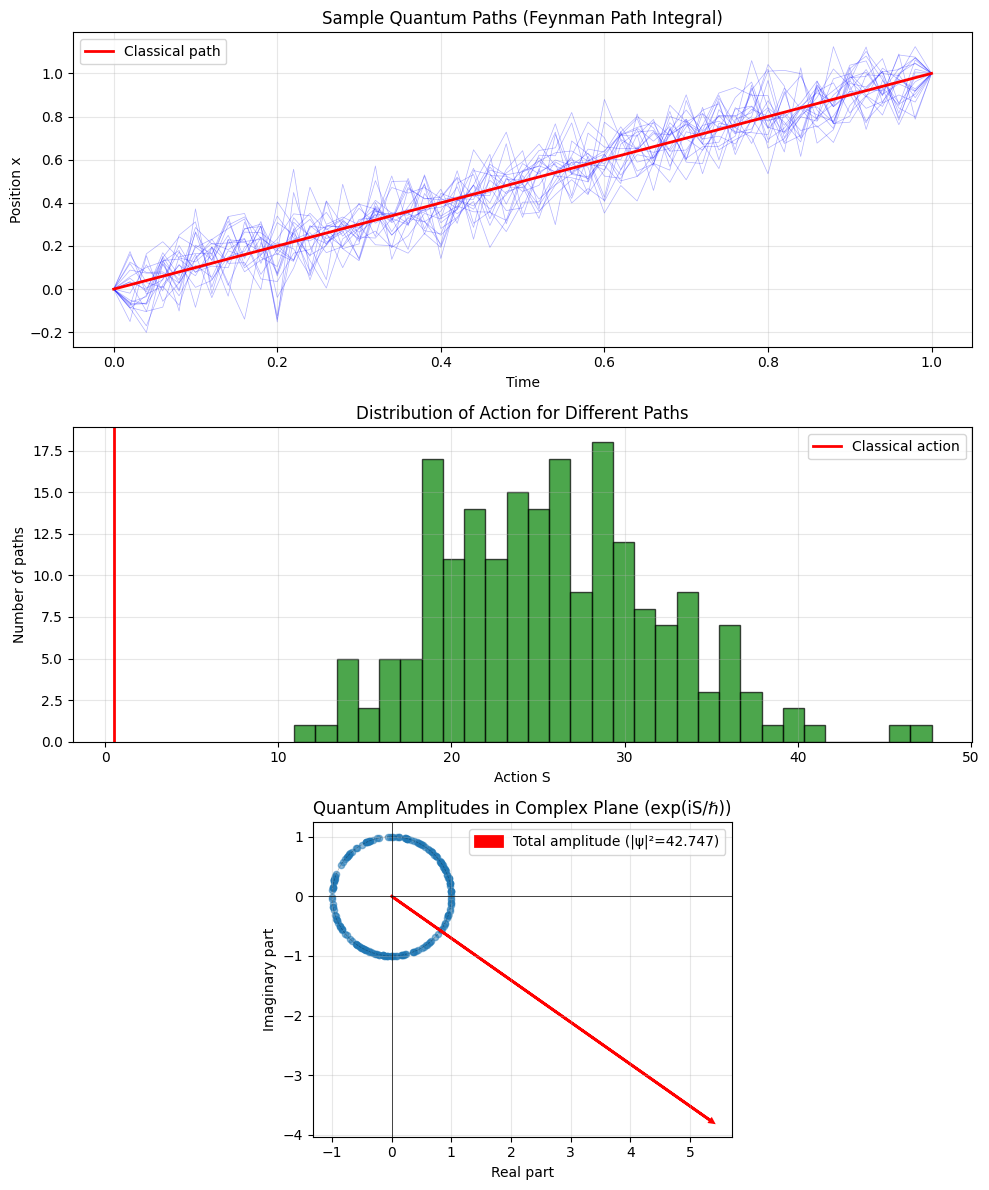

Transition probability: 42.747317

Note: In the complex plane plot, paths with similar actions
have similar phases and add constructively (quantum interference!)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class PathIntegral:
    """
    Simulate Feynman's path integral for a quantum particle.
    Models a particle moving from point A to point B in time T.
    """

    def __init__(self, x_start=0, x_end=1, time_total=1.0, n_steps=50, n_paths=100):
        """
        Initialize path integral simulation.

        Args:
            x_start: Starting position
            x_end: Ending position
            time_total: Total time for propagation
            n_steps: Number of time steps
            n_paths: Number of paths to sample
        """
        self.x_start = x_start
        self.x_end = x_end
        self.T = time_total
        self.N = n_steps
        self.n_paths = n_paths
        self.dt = time_total / n_steps
        self.hbar = 1.0  # Reduced Planck constant (natural units)
        self.m = 1.0     # Particle mass

    def generate_paths(self):
        """Generate random paths from start to end point."""
        paths = np.zeros((self.n_paths, self.N + 1))
        paths[:, 0] = self.x_start
        paths[:, -1] = self.x_end

        # Generate intermediate points with random walk
        # constrained to reach the endpoint
        for i in range(1, self.N):
            # Linear interpolation with random fluctuations
            linear = self.x_start + (self.x_end - self.x_start) * i / self.N
            fluctuation = np.random.normal(0, 0.1, self.n_paths)
            paths[:, i] = linear + fluctuation

        return paths

    def action(self, path):
        """
        Calculate the classical action S for a given path.
        S = ∫ L dt, where L = (1/2)m*v² - V(x)
        For free particle (V=0): S = (m/2) ∫ v² dt
        """
        velocities = np.diff(path) / self.dt
        kinetic_energy = 0.5 * self.m * velocities**2
        action = np.sum(kinetic_energy) * self.dt
        return action

    def quantum_amplitude(self, path):
        """
        Calculate quantum amplitude for a path.
        Amplitude = exp(i*S/ℏ)
        """
        S = self.action(path)
        return np.exp(1j * S / self.hbar)

    def calculate_propagator(self):
        """
        Calculate the quantum propagator by summing over all paths.
        K(x_f, x_i, T) = ∫ Dx(t) exp(i*S[x]/ℏ)
        """
        paths = self.generate_paths()
        amplitudes = []
        actions = []

        for path in paths:
            amp = self.quantum_amplitude(path)
            amplitudes.append(amp)
            actions.append(self.action(path))

        # Total amplitude is sum of all path amplitudes
        total_amplitude = np.sum(amplitudes)
        probability = np.abs(total_amplitude)**2

        return paths, np.array(amplitudes), np.array(actions), probability

    def plot_paths_and_phases(self):
        """Visualize paths and their quantum phases."""
        paths, amplitudes, actions, prob = self.calculate_propagator()

        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

        # Plot 1: Sample paths
        time_points = np.linspace(0, self.T, self.N + 1)
        for i, path in enumerate(paths[:20]):  # Show first 20 paths
            alpha = 0.3
            ax1.plot(time_points, path, 'b-', alpha=alpha, linewidth=0.5)

        # Highlight classical path (straight line)
        classical_path = np.linspace(self.x_start, self.x_end, self.N + 1)
        ax1.plot(time_points, classical_path, 'r-', linewidth=2,
                label='Classical path')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Position x')
        ax1.set_title('Sample Quantum Paths (Feynman Path Integral)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Plot 2: Action distribution
        ax2.hist(actions, bins=30, alpha=0.7, color='green', edgecolor='black')
        ax2.axvline(self.action(classical_path), color='red', linewidth=2,
                   label='Classical action')
        ax2.set_xlabel('Action S')
        ax2.set_ylabel('Number of paths')
        ax2.set_title('Distribution of Action for Different Paths')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # Plot 3: Quantum phases in complex plane
        real_parts = np.real(amplitudes)
        imag_parts = np.imag(amplitudes)

        ax3.scatter(real_parts, imag_parts, alpha=0.5, s=20)

        # Draw unit circle
        theta = np.linspace(0, 2*np.pi, 100)
        ax3.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.3, linewidth=0.5)

        # Draw sum of amplitudes
        total_amp = np.sum(amplitudes)
        ax3.arrow(0, 0, np.real(total_amp), np.imag(total_amp),
                 head_width=0.05, head_length=0.05, fc='red', ec='red',
                 linewidth=2, label=f'Total amplitude (|ψ|²={prob:.3f})')

        ax3.set_xlabel('Real part')
        ax3.set_ylabel('Imaginary part')
        ax3.set_title('Quantum Amplitudes in Complex Plane (exp(iS/ℏ))')
        ax3.set_aspect('equal')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.axhline(y=0, color='k', linewidth=0.5)
        ax3.axvline(x=0, color='k', linewidth=0.5)

        plt.tight_layout()
        plt.show()

        return prob

# Run the simulation
print("Feynman Path Integral Simulation")
print("=" * 50)
print("\nSimulating a quantum particle propagating from x=0 to x=1")
print("The particle explores ALL possible paths simultaneously!")
print("\nKey concepts:")
print("- Each path contributes amplitude: exp(i*S/ℏ)")
print("- S is the classical action for that path")
print("- Total amplitude = sum over all paths")
print("- Probability = |total amplitude|²\n")

# Create and run simulation
sim = PathIntegral(x_start=0, x_end=1, time_total=1.0,
                   n_steps=50, n_paths=200)
probability = sim.plot_paths_and_phases()

print(f"Transition probability: {probability:.6f}")
print("\nNote: In the complex plane plot, paths with similar actions")
print("have similar phases and add constructively (quantum interference!)")